In [1]:
!pip3 install tqdm pandas

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


# import

In [2]:
import os
import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from tqdm import tqdm
from PIL import Image

%matplotlib inline

# Load

In [3]:
vir_path = "./dataset/vir"
img_path = "./dataset/img256"

In [4]:
img_paths = glob("./dataset/img256/*.png")
len(img_paths), img_paths[:5]

(15000,
 ['./dataset/img256/a528c84ec2d75843e1592611b0040b0e.png',
  './dataset/img256/023c9a1bbdbf09e1171e69e016fcc95a.png',
  './dataset/img256/4c6c02165b1c45bcdc616186403a0bce.png',
  './dataset/img256/1e618bc6343d38c6e98ea3eed6102b68.png',
  './dataset/img256/f8842a9aa261ab9f0e017955c2b96f15.png'])

In [5]:
csv1_df = pd.read_csv("./dataset/1st_answer.csv", names=["vir","malware"])
csv2_df = pd.read_csv("./dataset/2nd_answer.csv", names=["vir","malware"])
csv_df = pd.concat([csv1_df,csv2_df])
csv_df.head()

,vir,malware
0,0003c3dd20cd99cf4555ab7c9232ec9c.vir,1
1,000590557e79980e147c3ff6521ec5cc.vir,1
2,0006c099239df9bcaab4c3cbc85e6ff8.vir,0
3,000fbf210ae21ff7604c025e1763a149.vir,1
4,00123e9b2a49b6750df39ad0e86508e2.vir,0


In [6]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 7499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vir      15000 non-null  object
 1   malware  15000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 351.6+ KB


# Save

In [7]:
csv_df["png"] = csv_df["vir"].str.replace("vir", "png")
csv_df = csv_df[['vir', 'png', 'malware']]
csv_df.head()

,vir,png,malware
0,0003c3dd20cd99cf4555ab7c9232ec9c.vir,0003c3dd20cd99cf4555ab7c9232ec9c.png,1
1,000590557e79980e147c3ff6521ec5cc.vir,000590557e79980e147c3ff6521ec5cc.png,1
2,0006c099239df9bcaab4c3cbc85e6ff8.vir,0006c099239df9bcaab4c3cbc85e6ff8.png,0
3,000fbf210ae21ff7604c025e1763a149.vir,000fbf210ae21ff7604c025e1763a149.png,1
4,00123e9b2a49b6750df39ad0e86508e2.vir,00123e9b2a49b6750df39ad0e86508e2.png,0


In [8]:
malware_len = []

for index, row in tqdm(csv_df.iterrows()):
    with open(f"{vir_path}/{row['vir']}", "rb") as hex_file:
        hex_array = hex_file.read()
        malware_len.append(len(hex_array))
        
malware_len[:5]

15000it [00:02, 6789.29it/s]


[192902, 199684, 42340, 440988, 614478]

In [9]:
csv_df["len"] = malware_len
csv_df = csv_df[['vir', 'png', 'len', 'malware']]
csv_df.head()

,vir,png,len,malware
0,0003c3dd20cd99cf4555ab7c9232ec9c.vir,0003c3dd20cd99cf4555ab7c9232ec9c.png,192902,1
1,000590557e79980e147c3ff6521ec5cc.vir,000590557e79980e147c3ff6521ec5cc.png,199684,1
2,0006c099239df9bcaab4c3cbc85e6ff8.vir,0006c099239df9bcaab4c3cbc85e6ff8.png,42340,0
3,000fbf210ae21ff7604c025e1763a149.vir,000fbf210ae21ff7604c025e1763a149.png,440988,1
4,00123e9b2a49b6750df39ad0e86508e2.vir,00123e9b2a49b6750df39ad0e86508e2.png,614478,0


In [10]:
csv_df.to_csv("./dataset/malware1.csv")

# Preprocessing

In [11]:
csv_df.describe()

,len,malware
count,1.500000e+04,15000.000000
mean,7.314490e+05,0.700000
std,1.273530e+06,0.458273
min,1.208000e+03,0.000000
25%,1.054760e+05,0.000000
50%,3.679000e+05,1.000000
75%,7.989920e+05,1.000000
max,3.502490e+07,1.000000


In [12]:
malware_df = csv_df[csv_df["malware"] == 1]
no_malware_df = csv_df[csv_df["malware"] == 0]
malware_df.head()

,vir,png,len,malware
0,0003c3dd20cd99cf4555ab7c9232ec9c.vir,0003c3dd20cd99cf4555ab7c9232ec9c.png,192902,1
1,000590557e79980e147c3ff6521ec5cc.vir,000590557e79980e147c3ff6521ec5cc.png,199684,1
3,000fbf210ae21ff7604c025e1763a149.vir,000fbf210ae21ff7604c025e1763a149.png,440988,1
5,00193e19e0d474a6dceadc57a55171df.vir,00193e19e0d474a6dceadc57a55171df.png,589958,1
7,002b7e714ab8769215c2ef684e0ccb5c.vir,002b7e714ab8769215c2ef684e0ccb5c.png,986116,1


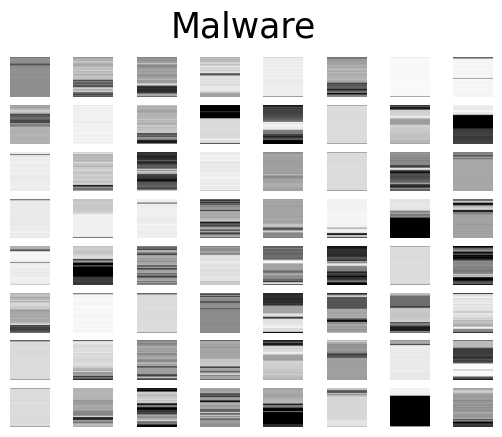

In [13]:
malware_list = malware_df["png"].values.tolist()[:64]

for i in range(64):
    img = Image.open(f"{img_path}/{malware_list[i]}").convert('L')
    
    plt.subplot(8, 8, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.suptitle('Malware', fontsize=25)
plt.show()

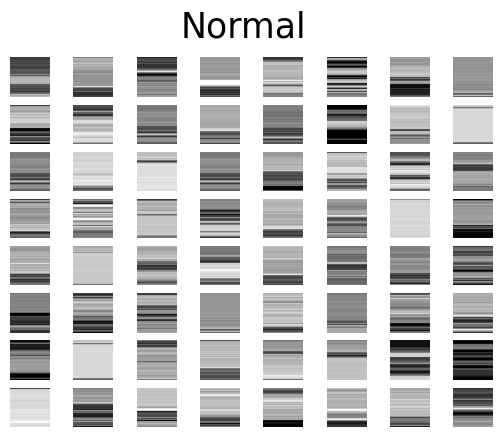

In [15]:
no_malware_list = no_malware_df["png"].values.tolist()[:64]

for i in range(64):
    img = Image.open(f"{img_path}/{no_malware_list[i]}").convert('L')
    
    plt.subplot(8, 8, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.suptitle('Normal', fontsize=25)
plt.show()